Animation saved as double_pendulum.mp4


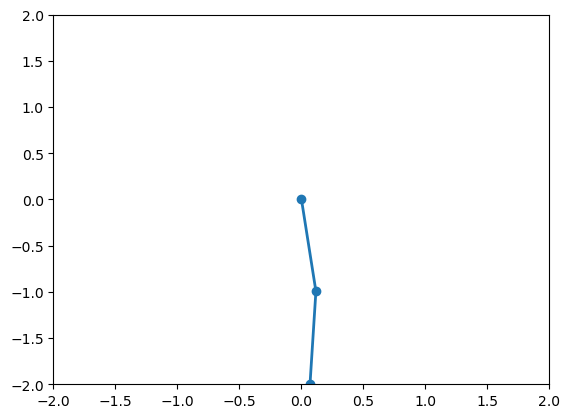

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.integrate import solve_ivp

# Parameters
g = 9.81  # gravity
L1, L2 = 1.0, 1.0  # lengths of pendulums
m1, m2 = 1.0, 1.0  # masses

# Equations of motion
def deriv(t, y):
    θ1, z1, θ2, z2 = y
    c, s = np.cos(θ1 - θ2), np.sin(θ1 - θ2)

    θ1_dot = z1
    θ2_dot = z2

    z1_dot = ((m2 * g * np.sin(θ2) * c - m2 * s * (L1 * z1**2 * c + L2 * z2**2) -
               (m1 + m2) * g * np.sin(θ1)) /
              (L1 * (m1 + m2 * s**2)))

    z2_dot = (((m1 + m2) * (L1 * z1**2 * s - g * np.sin(θ2) + g * np.sin(θ1) * c) +
               m2 * L2 * z2**2 * s * c) /
              (L2 * (m1 + m2 * s**2)))

    return [θ1_dot, z1_dot, θ2_dot, z2_dot]

# Initial conditions: [θ1, θ1_dot, θ2, θ2_dot]
y0 = [np.pi , 0, np.pi / 2, 0]
t_span = (0, 50)
t_eval = np.linspace(*t_span, 1000)

# Solve ODE
sol = solve_ivp(deriv, t_span, y0, t_eval=t_eval)

# Extract positions
θ1, θ2 = sol.y[0], sol.y[2]
x1 = L1 * np.sin(θ1)
y1 = -L1 * np.cos(θ1)
x2 = x1 + L2 * np.sin(θ2)
y2 = y1 - L2 * np.cos(θ2)

# Animation
fig, ax = plt.subplots()
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
line, = ax.plot([], [], 'o-', lw=2)

def init():
    line.set_data([], [])
    return line,

def update(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]
    line.set_data(thisx, thisy)
    return line,

ani = animation.FuncAnimation(fig, update, frames=len(t_eval),
                              init_func=init, blit=True, interval=20)

# Save animation as MP4
ani.save("double_pendulum2.mp4", writer="ffmpeg")

print("Animation saved as double_pendulum.mp4")



